CANNY EDGE DETECTION

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

path=r'D:/Study/Python/openCV/College/res/'

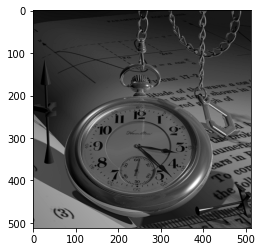

In [2]:
img= cv2.imread(path+'img27.bmp',0)
height,width=img.shape
plt.imshow(img,'gray')

In [3]:
arr=np.asarray(cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_CONSTANT,value=0))

NOISE REDUCTION

In [4]:
kernel=np.array([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]])

sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
blur=np.zeros(img.shape,dtype='uint8')
sobel=np.zeros(img.shape)

Text(0.5, 1.0, 'Blur Image')

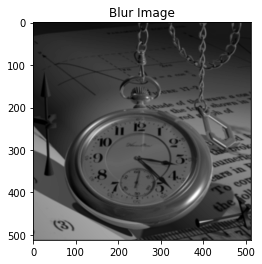

In [5]:
for i in range(height):
    for j in range(width):
        blur[i,j]=int(np.sum(arr[i:i+5 , j:j+5]*kernel)/np.sum(kernel))
plt.imshow(blur,'gray')
plt.title("Blur Image")

In [6]:
sb_i=cv2.copyMakeBorder(blur,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
sx=np.zeros(img.shape)
sy=np.zeros(img.shape)

for i in range(height):
    for j in range(width):
        sx[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_x)
        sy[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_y)
        sobel[i,j]=round(math.sqrt(sy[i,j]*sy[i,j] + sx[i,j]*sx[i,j]))
for i in range(height):
    for j in range(width):
        sobel[i,j]=sobel[i,j] / sobel.max() *255

theta = np.arctan2(sy, sx)

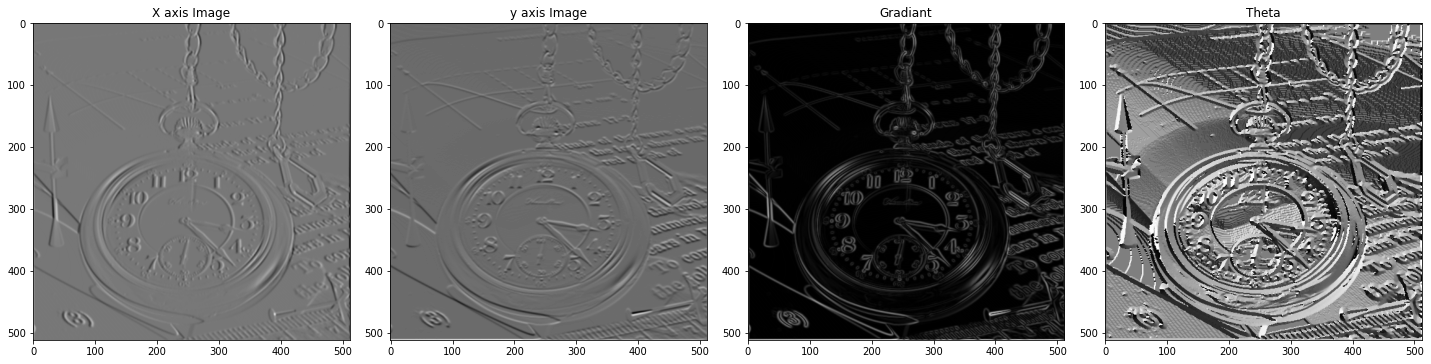

In [20]:
plt.figure(figsize=(20,20))

plt.subplot(1,4,1)
plt.imshow(sx,'gray')
plt.title("X axis Image")

plt.subplot(1,4,2)
plt.imshow(sy,'gray')
plt.title("y axis Image")

plt.subplot(1,4,3)
plt.imshow(sobel,'gray')
plt.title("Gradiant")

plt.subplot(1,4,4)
plt.imshow(theta,'gray')
plt.title("Theta")

plt.tight_layout()

In [8]:
print(theta)
print(sobel)

[[-0.8131688  -1.35970299 -1.53747533 ... -1.60526543 -1.78275396
  -2.35619449]
 [-0.27829966 -0.93428811 -1.48765509 ... -1.73070945 -2.35619449
  -2.92963502]
 [-0.0475831  -0.25732371 -1.16590454 ... -2.35619449 -2.98167953
  -3.10712355]
 ...
 [ 0.03966173  0.18353963  0.78539816 ...  2.02961306  2.31274359
   2.8198421 ]
 [ 0.21588085  0.78539816  1.38725669 ...  1.90804952  2.27792335
   2.85554121]
 [ 0.78539816  1.35491548  1.5311346  ...  1.648898    1.81577499
   2.38896963]]
[[ 20.70859873  23.14490446  24.36305732 ...  35.32643312  32.89012739
   29.23566879]
 [ 23.55095541  11.77547771   9.74522293 ...  12.58757962  15.42993631
   32.89012739]
 [ 25.58121019   8.12101911   3.24840764 ...   4.06050955  12.58757962
   35.32643312]
 ...
 [204.64968153  69.02866242  19.89649682 ...  37.76273885  39.79299363
   57.65923567]
 [189.62579618  87.30095541  69.02866242 ...  33.29617834  29.23566879
   43.04140127]
 [170.13535032 189.62579618 204.64968153 ... 115.          99.
   86

In [9]:
angle = theta * 180. / np.pi
angle[angle < 0] += 180
print(angle)

[[133.40885973 102.09475708  91.90915243 ...  88.02506599  77.85572195
   45.        ]
 [164.0546041  126.46923439  94.76364169 ...  80.83765295  45.
   12.14427805]
 [177.27368901 165.25643716 113.19859051 ...  45.           9.16234705
    1.97493401]
 ...
 [  2.27244973  10.51604638  45.         ... 116.28826212 132.51044708
  161.56505118]
 [ 12.36906153  45.          79.48395362 ... 109.32318432 130.51539399
  163.61045967]
 [ 45.          77.63093847  87.72755027 ...  94.47489651 104.03624347
  136.87787745]]


In [10]:
n_m_s=np.zeros(img.shape, dtype=np.int32)
for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        try:
            q = 255
            r = 255

            #angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = sobel[i, j+1]
                r = sobel[i, j-1]
            #angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = sobel[i+1, j-1]
                r = sobel[i-1, j+1]
            #angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = sobel[i+1, j]
                r = sobel[i-1, j]
            #angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = sobel[i-1, j-1]
                r = sobel[i+1, j+1]
            if (sobel[i,j] >= q) and (sobel[i,j] >= r):
                n_m_s[i,j] = sobel[i,j]
            else:
                n_m_s[i,j] = 0
        except IndexError as e:
            pass

Text(0.5, 1.0, 'Non Max Supression')

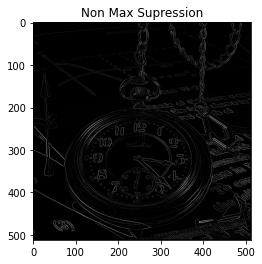

In [11]:
plt.imshow(n_m_s,'gray')
plt.title("Non Max Supression")

In [12]:
weak = np.int32(25)
strong = np.int32(255)
highThreshold = n_m_s.max() * 0.09
lowThreshold = highThreshold * 0.05

dub_thres=np.zeros(img.shape,dtype=np.int32)

strong_i, strong_j = np.where(n_m_s >= highThreshold)
zeros_i, zeros_j = np.where(n_m_s < lowThreshold)

weak_i, weak_j = np.where((n_m_s <= highThreshold) & (n_m_s >= lowThreshold))

dub_thres[strong_i, strong_j] = strong
dub_thres[weak_i, weak_j] = weak

Text(0.5, 1.0, 'Double Threshold')

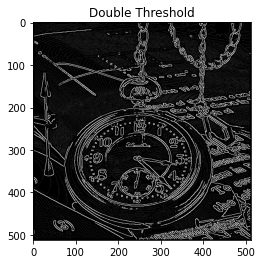

In [13]:
plt.imshow(dub_thres,'gray')
plt.title("Double Threshold")

In [14]:
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        if (dub_thres[i,j] == weak):
            try:

                if ((dub_thres[i+1, j-1] == strong) or (dub_thres[i+1, j] == strong) or 
                (dub_thres[i+1, j+1]== strong) or (dub_thres[i, j-1] == strong) or 
                (dub_thres[i, j+1] == strong) or (dub_thres[i-1, j-1] == strong)or 
                (dub_thres[i-1, j] == strong) or (dub_thres[i-1, j+1] == strong)):
                    dub_thres[i, j] = strong
                else:
                    dub_thres[i, j] = 0
            except IndexError as e:
                pass

Text(0.5, 1.0, 'Final Image of Canny Edge Detection')

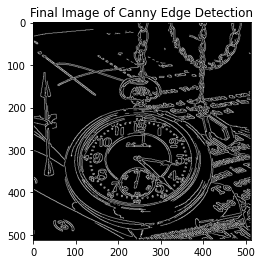

In [15]:
plt.imshow(dub_thres,'gray')
plt.title("Final Image of Canny Edge Detection")